In [233]:
# importing modules and reading the data set
import pandas as pd, numpy as np, csv 
import matplotlib.pyplot as plt
ds = pd.read_csv('kc_house_data.csv')
ds

,sqft,floors,bedrooms,bathrooms,price
0,5650,1.0,3,1.00,221900.0
1,7242,2.0,3,2.25,538000.0
2,10000,1.0,2,1.00,180000.0
3,5000,1.0,4,3.00,604000.0
4,8080,1.0,3,2.00,510000.0
5,101930,1.0,4,4.50,1230000.0
6,6819,2.0,3,2.25,257500.0
7,9711,1.0,3,1.50,291850.0
8,7470,1.0,3,1.00,229500.0
9,6560,2.0,3,2.50,323000.0


In [234]:
# Normalizing the data set
ds = (ds - ds.mean())/ds.max()

In [235]:
# Dividing data set into training and testing data sets
training_ds = ds[0:int(0.8*len(ds))].as_matrix()
training_ds = np.insert(training_ds,0,1,axis=1)
test_ds = ds[int(0.8*len(ds)):len(ds)].as_matrix()
test_ds = np.insert(test_ds,0,1,axis=1)

In [236]:
# Diving into features and output
train_x = training_ds[:,:-1]
train_y = training_ds[:,-1]
test_x = test_ds[:,:-1]
test_y = test_ds[:,-1]
alpha = 0.05 # Learning rate
n = train_x.shape[1] # No. of features
theta = np.random.randn(n) # Initial value of thetas

In [237]:
# Cost function is mean squared error
def cost_function(x,y,theta):
    m = len(x)
    error = np.sum((x.dot(theta)-y).dot(x.dot(theta)-y))
    error= error/(2*m)
    return error

In [238]:
# Root mean squared error function
def rmse(x,y,theta):
    m = len(x)
    error = np.sum((x.dot(theta)-y).dot(x.dot(theta)-y))
    error = math.sqrt(error/m)
    return error

In [239]:
# Method for gradient descent without regularization
def gradient_descent_wo_regularization(x,y,theta,alpha):
    m = len(x)
    itera = 0
    loss = []
    while itera != 1000 :
#         print("Iteration : ",itera)
        prev_cost = rmse(x,y,theta)
        loss.append(prev_cost)
        theta = theta - ((alpha)*np.sum(((x.dot(theta)-y))*x.T,axis=1))/m
        itera = itera+1
#     plt.plot(range(0,len(loss)),loss, label = 'Gradient_Descent')
#         print("Cost : ",cost_function(x,y,theta))
    return theta

In [240]:
def irls_predict(x, theta):
    return x.dot(theta)

def irls(x,y,theta):
    loss = []
    itera = 0
    while itera!=1000:
        prev_cost = rmse(x,y,theta)
        loss.append(prev_cost)
        itera = itera + 1
        theta = theta - np.linalg.inv(x.T.dot(x)).dot(x.T.dot(x).dot(theta) - x.T.dot(y))
#         print ("Iteration: ", itera, " RMSE: ", prev_cost)
#     plt.plot(range(0,len(loss)),loss, label = 'IRLS')
    return theta

Learning Rate GD:  0.0  , Thetas :  [ 1.  1.  1.  1.  1.]
Learning Rate IRLS:  0.0  , Thetas :  [ 0.0008177   0.08097741  0.00915992  0.07491422  0.24162522]
Learning Rate GD:  0.0111111111111  , Thetas :  [ 0.01797919  0.99027491  0.75013572  0.97289086  0.85434827]
Learning Rate IRLS:  0.0111111111111  , Thetas :  [ 0.0008177   0.08097741  0.00915992  0.07491422  0.24162522]
Learning Rate GD:  0.0222222222222  , Thetas :  [ 0.01355606  0.98155933  0.54840738  0.95016849  0.73413147]
Learning Rate IRLS:  0.0222222222222  , Thetas :  [ 0.0008177   0.08097741  0.00915992  0.07491422  0.24162522]
Learning Rate GD:  0.0333333333333  , Thetas :  [ 0.01020334  0.97337028  0.39656252  0.93096343  0.63855517]
Learning Rate IRLS:  0.0333333333333  , Thetas :  [ 0.0008177   0.08097741  0.00915992  0.07491422  0.24162522]
Learning Rate GD:  0.0444444444444  , Thetas :  [ 0.00765588  0.96560207  0.282626    0.91449815  0.56203391]
Learning Rate IRLS:  0.0444444444444  , Thetas :  [ 0.0008177   0.

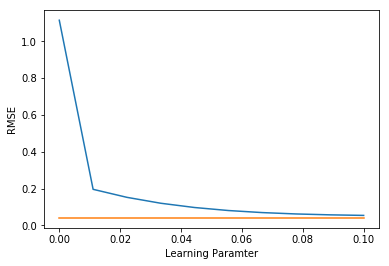

In [241]:
if __name__ == '__main__':
    
    alp = np.linspace(0,0.1,num=10)
    rmse_irls = []
    rmse_gd = []
    for alpha_ in alp:
        theta = np.ones(n)
        theta = gradient_descent_wo_regularization(train_x,train_y,theta,alpha_)
        rmse_gd.append(rmse(test_x,test_y,theta))
        print("Learning Rate GD: ",alpha_," , Thetas : ",theta)
        theta = np.ones(n)
        theta = irls(train_x,train_y,theta)
        rmse_irls.append(rmse(test_x,test_y,theta))
        print("Learning Rate IRLS: ",alpha_," , Thetas : ",theta)
#     print("RMSE Gradient Descent: ",rmse(test_x,test_y,theta))
    plt.plot(alp,rmse_gd)
    plt.plot(alp,rmse_irls)
    plt.xlabel("Learning Paramter")
    plt.ylabel("RMSE")
    # IRLS in Orange
    # Gradient Descent in Blue